In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Needs both of these added

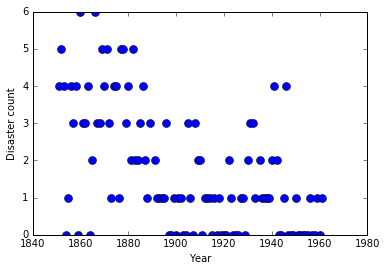

In [4]:
disaster_data = np.ma.masked_values([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, -999, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], value=-999)
year = np.arange(1851, 1962)

plt.plot(year, disaster_data, 'o', markersize=8);
plt.ylabel("Disaster count")
plt.xlabel("Year")

In [7]:
from pymc3 import DiscreteUniform, Poisson, switch, Model, Exponential
# Needs Model, Exponential added

with Model() as disaster_model:

    switchpoint = DiscreteUniform('switchpoint', lower=year.min(), upper=year.max(), testval=1900)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = Exponential('early_rate', 1)
    late_rate = Exponential('late_rate', 1)

    # Allocate appropriate Poisson rates to years before and after current
    rate = switch(switchpoint >= year, early_rate, late_rate)

    disasters = Poisson('disasters', rate, observed=disaster_data)

Applied log-transform to early_rate and added transformed early_rate_log to model.
Applied log-transform to late_rate and added transformed late_rate_log to model.


In [12]:
from pymc3 import Metropolis, NUTS, sample, traceplot
# Needs NUTS added, sample as well

with disaster_model:
    step1 = NUTS([early_rate, late_rate])

    # Use Metropolis for switchpoint, and missing values since it accommodates discrete variables
    step2 = Metropolis([switchpoint, disasters.missing_values[0]] )

    trace = sample(10000, step=[step1, step2])

 [-----------------100%-----------------] 10000 of 10000 complete in 7.8 sec

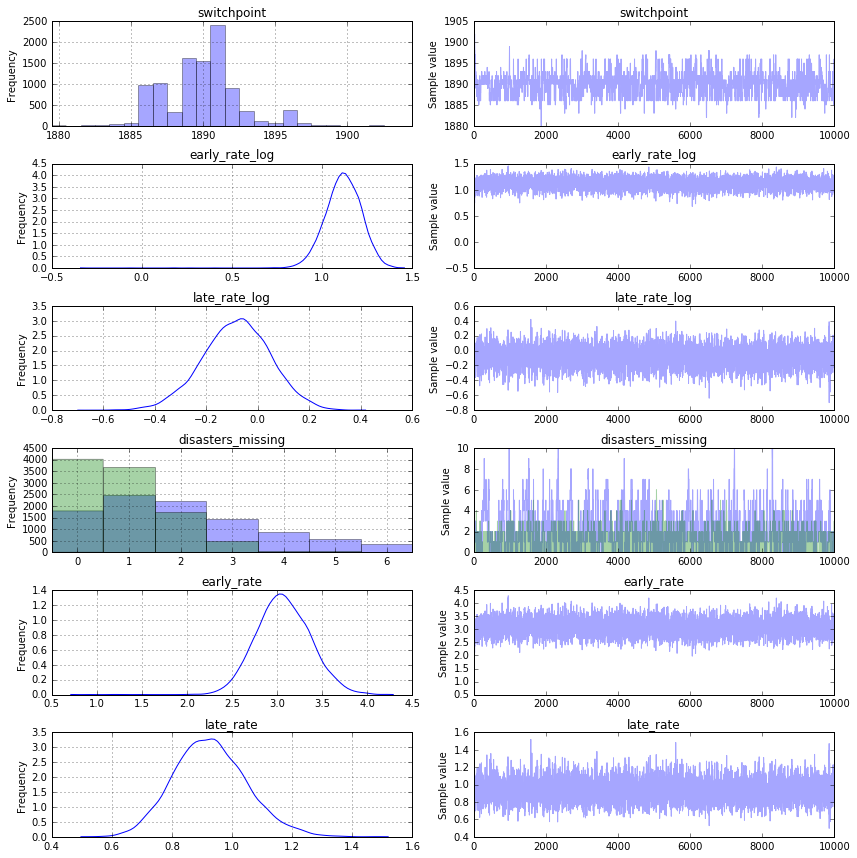

In [13]:
traceplot(trace);